In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [250]:
pd.pandas.set_option('display.max_columns',None)

In [251]:
dataset=pd.read_csv('train(House_Price).csv')

In [252]:
dataset.head(5) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis

In [253]:
dataset.info() ##Acquiring basic info about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can observe that there is a lot of missing values in many features.
So first we will gather the features which have missing values in one place.

In [254]:
##Creating a list of features which have atleast one missing value 

features_miss_value=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

In [255]:
##Let us have a look at which feature contains what percentage of missing values

for i in features_miss_value:
    print(i,'has',np.round(dataset[i].isnull().mean(),3),'% missing values')

LotFrontage has 0.177 % missing values
Alley has 0.938 % missing values
MasVnrType has 0.005 % missing values
MasVnrArea has 0.005 % missing values
BsmtQual has 0.025 % missing values
BsmtCond has 0.025 % missing values
BsmtExposure has 0.026 % missing values
BsmtFinType1 has 0.025 % missing values
BsmtFinType2 has 0.026 % missing values
Electrical has 0.001 % missing values
FireplaceQu has 0.473 % missing values
GarageType has 0.055 % missing values
GarageYrBlt has 0.055 % missing values
GarageFinish has 0.055 % missing values
GarageQual has 0.055 % missing values
GarageCond has 0.055 % missing values
PoolQC has 0.995 % missing values
Fence has 0.808 % missing values
MiscFeature has 0.963 % missing values


We can see that features such as Alley, PoolQC, Fence and MiscFeature have above 70% of missing values

In this dataset, 'SalePrice' is the target feature. Since there is a lot of features with missing values it is better to look for relation between those features and the target feature



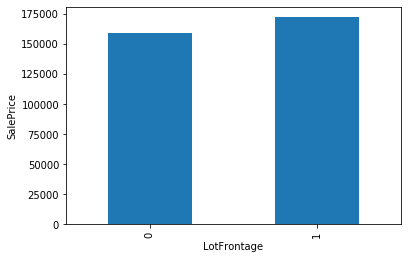

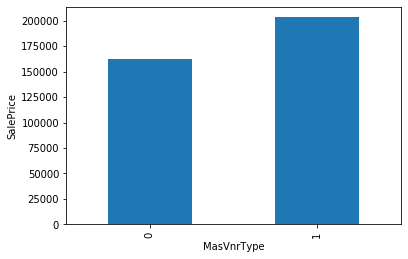

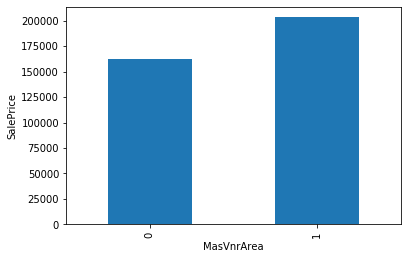

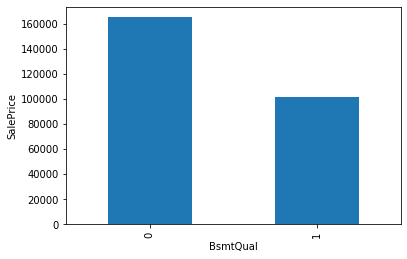

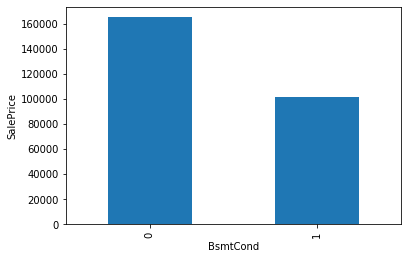

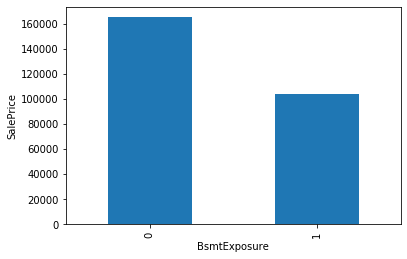

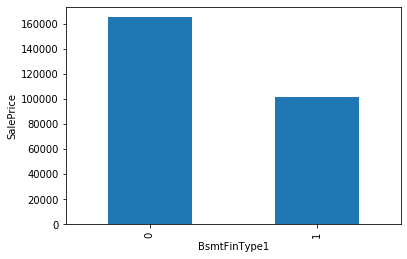

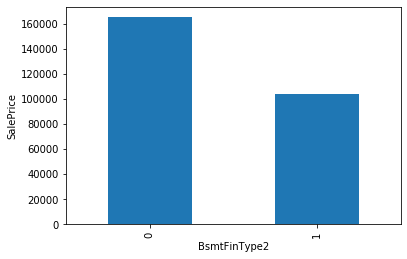

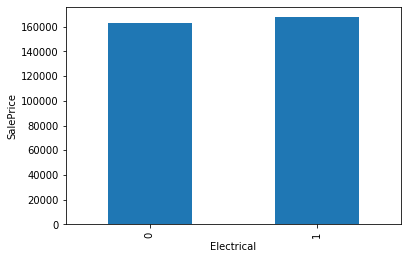

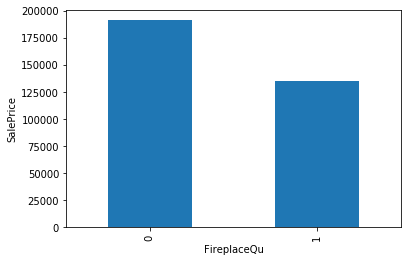

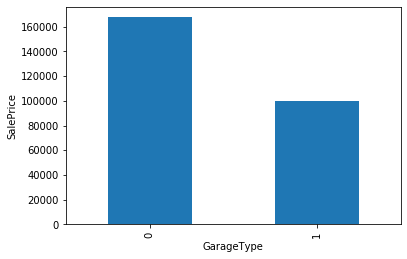

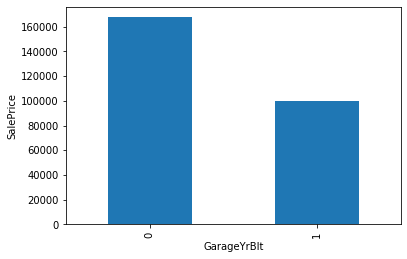

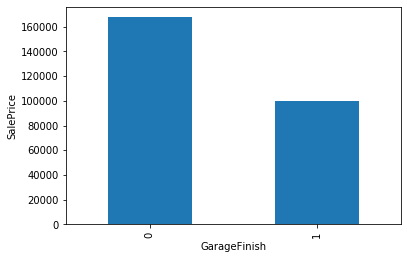

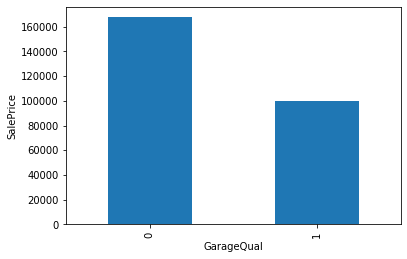

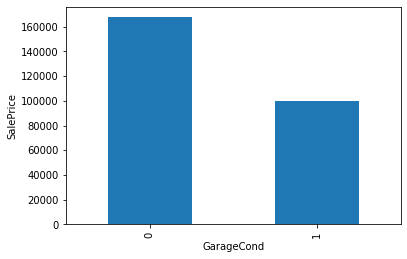

In [256]:
##Now lets make a list of features which have less than 50% missing values and see the relation between them and the target feature

features_wth_less_miss_value=[features for features in features_miss_value if dataset[features].isnull().mean()<.50]

data=dataset.copy()
for i in features_wth_less_miss_value:
    data[i]=np.where(data[i].isnull(),1,0)
    data.groupby(i)['SalePrice'].median().plot(kind='bar')
    plt.ylabel('SalePrice')
    plt.show()
    

We can see that there is a relation between the missing values and the target feature

In [257]:
## Now we will separate the numerical and categorical features


In [258]:
## Separating the numerical features in a single list

numerical_features=[features for features in dataset.columns if dataset[features].dtype!='O' and features not in ['Id','SalePrice']]


In [259]:
## Let us separate temporal features such as Date Time features from the numerical features

temporal_features=[features for features in numerical_features if 'Year' in features or 'Yr' in features]

In [260]:
## Now numerical features are of two types. Discrete and continuous.

## To get discrete featuers

dis_numerical_features=[features for features in numerical_features if len(dataset[features].unique())<30 and features not in temporal_features] ##We are selecting a thresh hold of 30 

## To get continuous features

cont_numerical_features=[features for features in numerical_features if features not in dis_numerical_features + temporal_features ]

Now let us look for relation among various types of numerical features and the Target feature

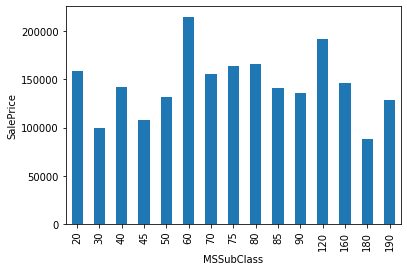

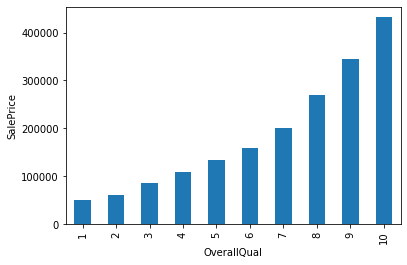

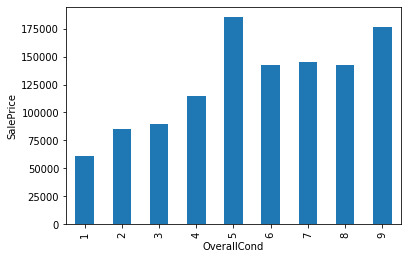

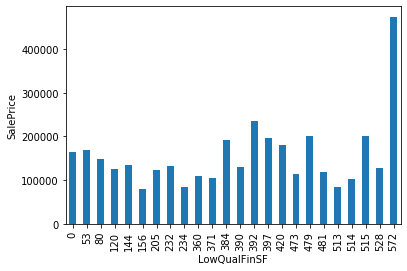

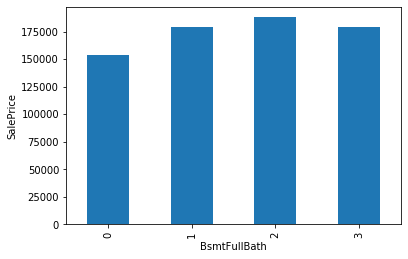

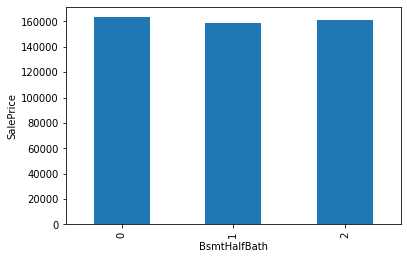

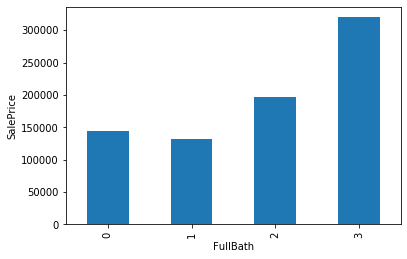

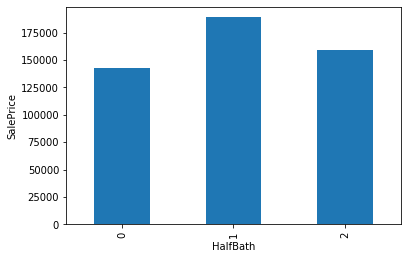

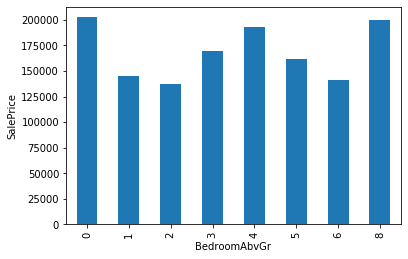

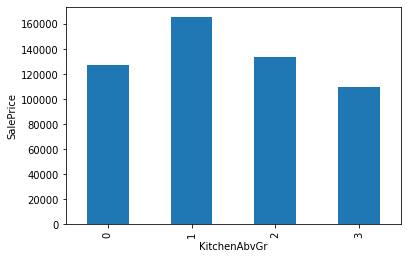

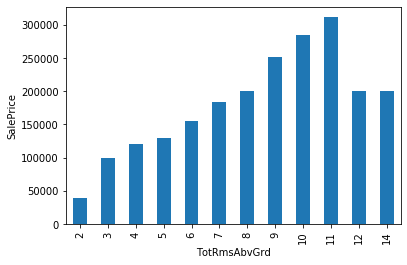

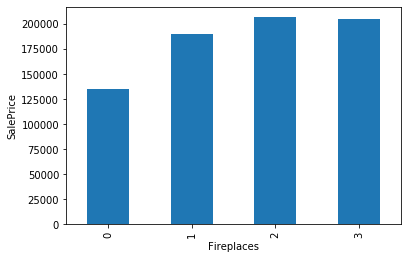

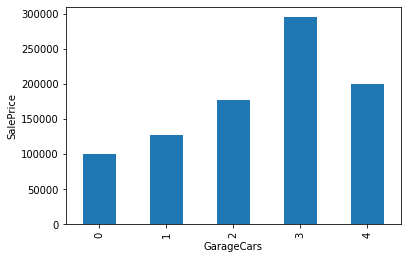

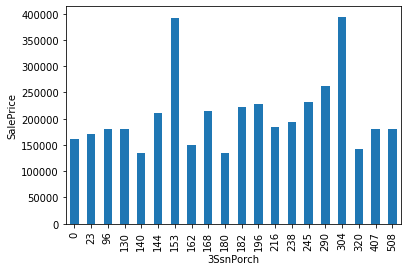

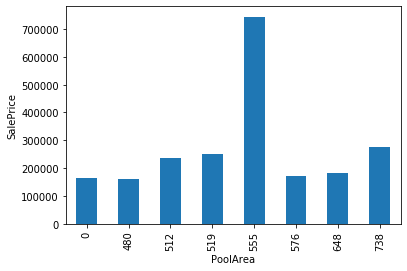

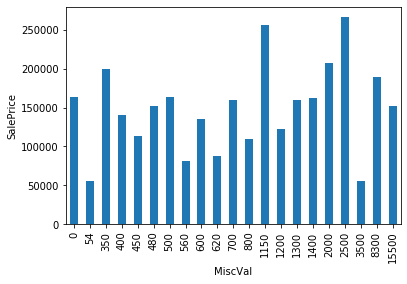

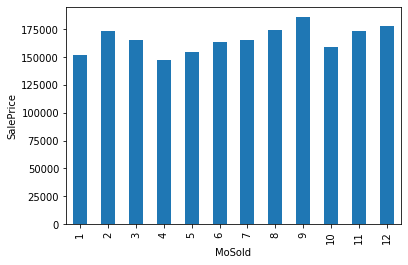

In [261]:
## Relation between discrete features and Target feature

data=dataset.copy()
for i in dis_numerical_features:
    data.groupby(i)['SalePrice'].median().plot(kind='bar')
    plt.ylabel('SalePrice')
    plt.show()
    

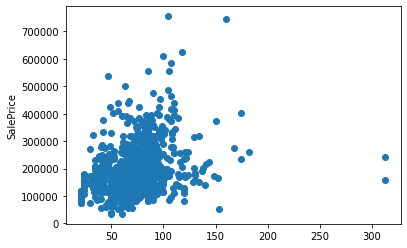

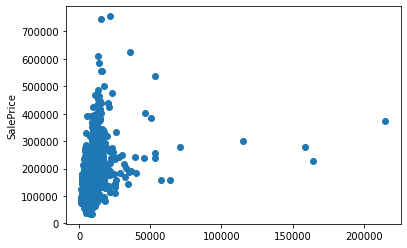

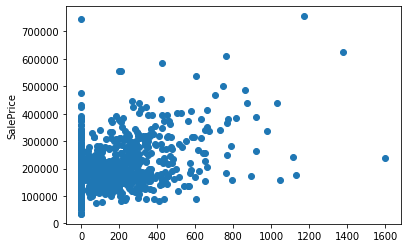

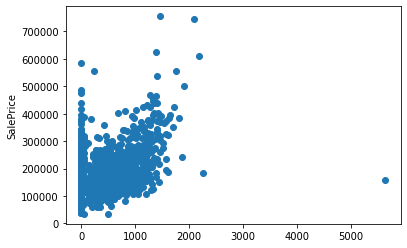

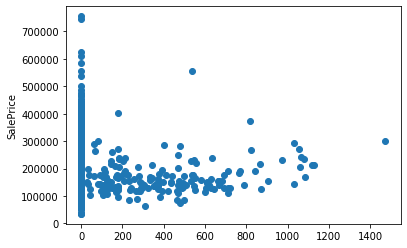

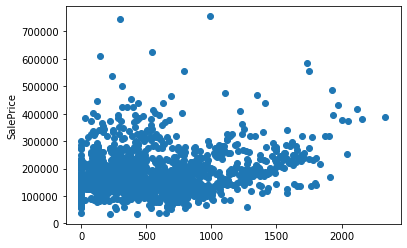

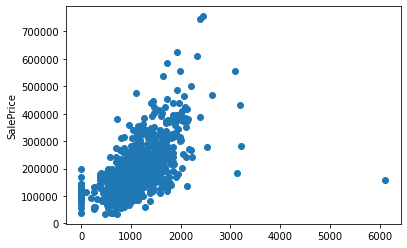

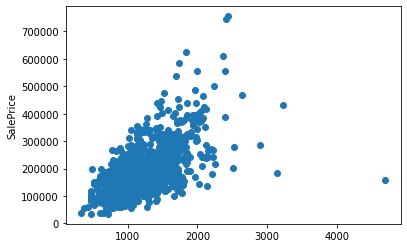

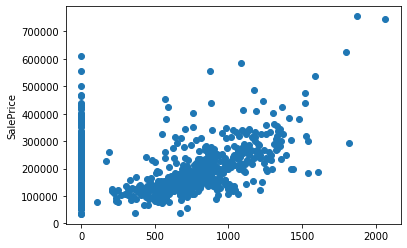

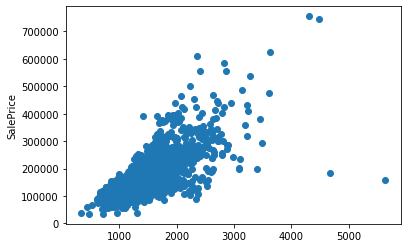

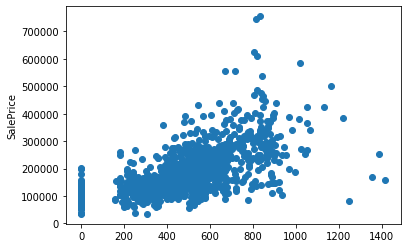

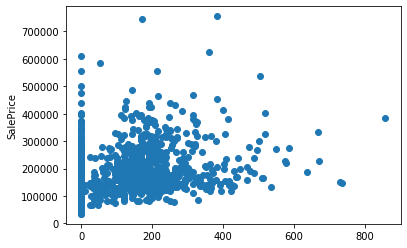

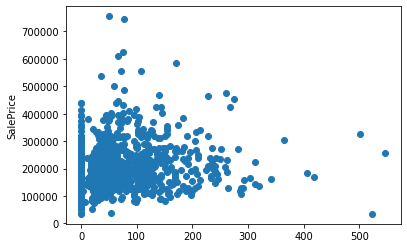

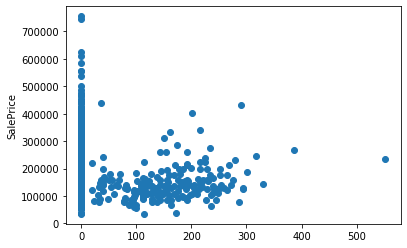

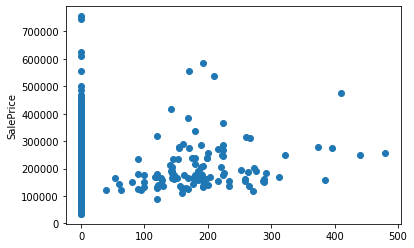

In [262]:
## Relation between continuous and Target feature

data=dataset.copy()
for i in cont_numerical_features:
    plt.scatter(data[i],data['SalePrice'])
    plt.ylabel('SalePrice')
    plt.show()

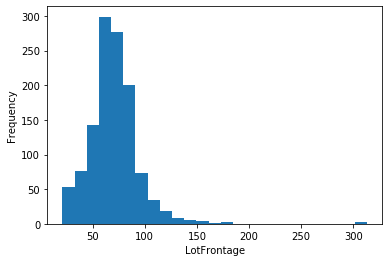

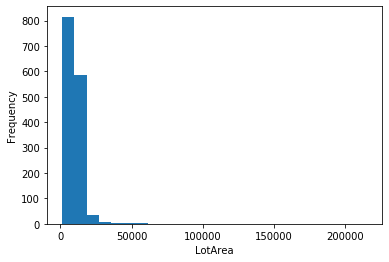

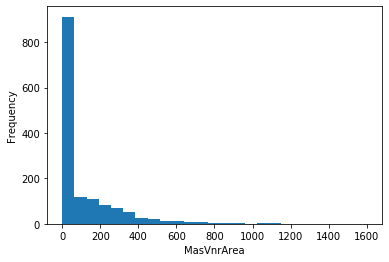

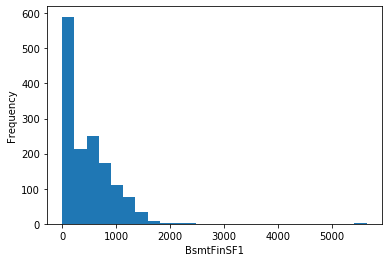

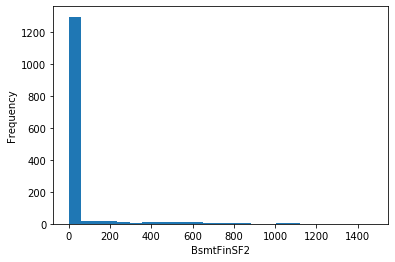

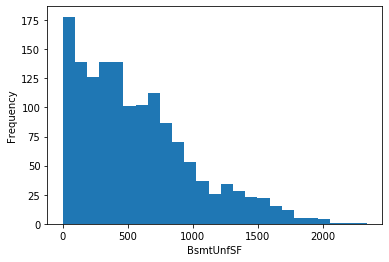

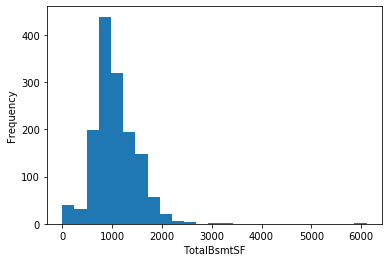

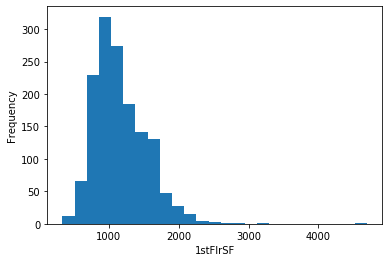

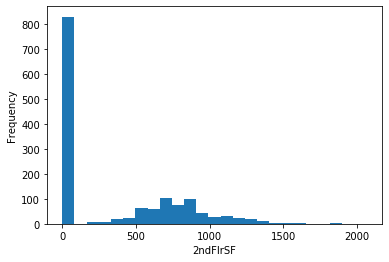

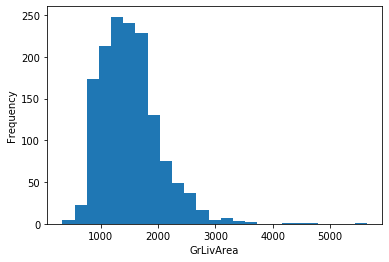

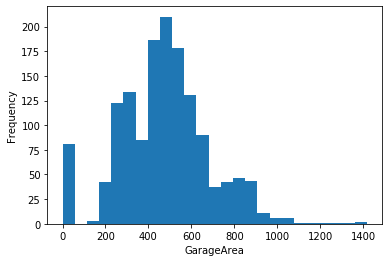

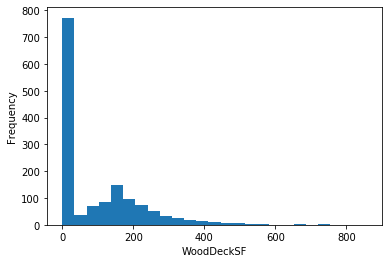

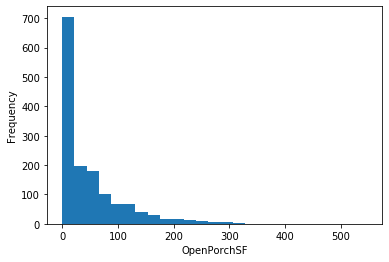

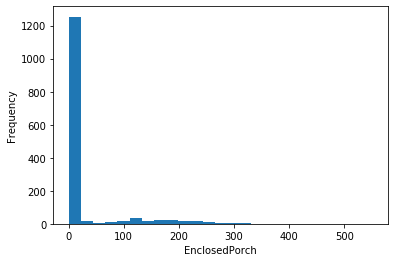

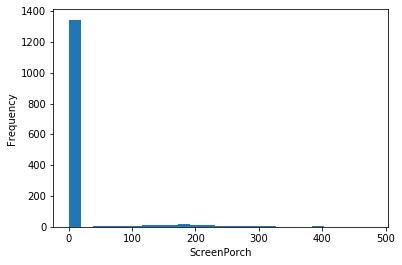

In [263]:
## From the continuous features we can see that there is a certain skewness present. Let's analyze it a bit more

data=dataset.copy()
for i in cont_numerical_features:
    data[i].plot(kind='hist',bins=25)
    plt.xlabel(i)
    plt.show()

As we can see there is a certain skewness present in the continuous features.
Let's get rid of the skewness through Log Transform

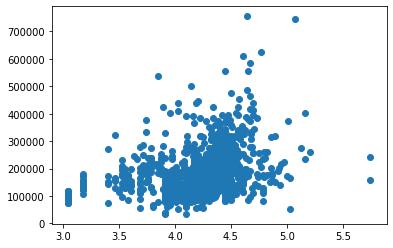

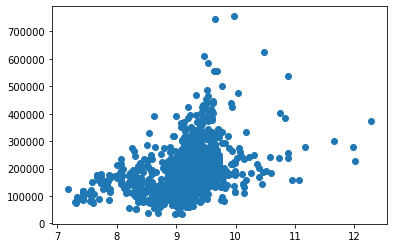

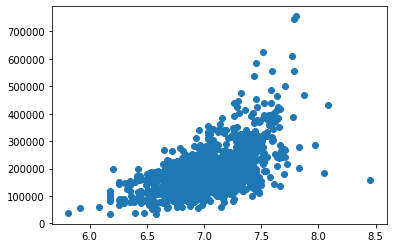

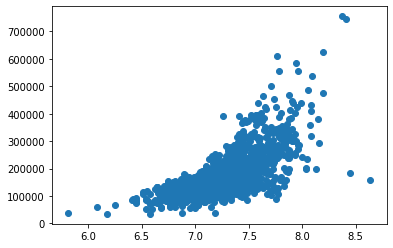

In [264]:
data=dataset.copy()

for i in cont_numerical_features:
    if 0 not in data[i].unique():
        data[i]=np.log(data[i])
        plt.scatter(data[i],data['SalePrice'])
        plt.show()

 As we can now the features are less skewed than before.

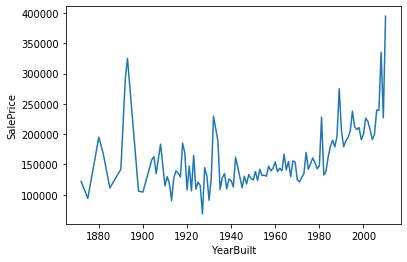

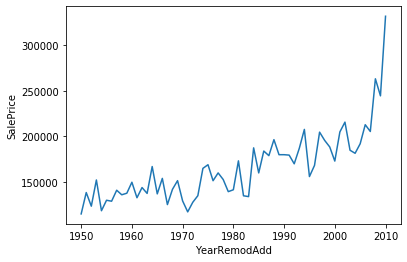

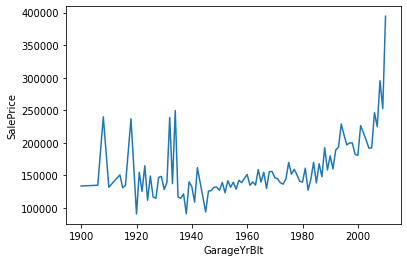

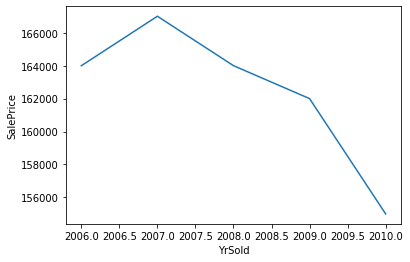

In [265]:
## Now let's analyze the temporal features with respect to target feature

data=dataset.copy()

for i in temporal_features:
    data.groupby(i)['SalePrice'].median().plot()
    plt.ylabel('SalePrice')
    plt.show()

In [266]:
## We can see something unusual in YrSold case. Usually if the house is sole more recently it will be relatively more costly than if it was sold years ago. But the plot says otherwise
## So let's dig a little deeper here

dataset['Year_sold_diff']=dataset['YrSold']-dataset['YearBuilt']

new_temporal_features=[features for features in dataset.columns if 'Year' in features or 'Yr' in features]

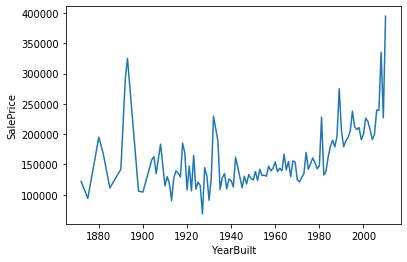

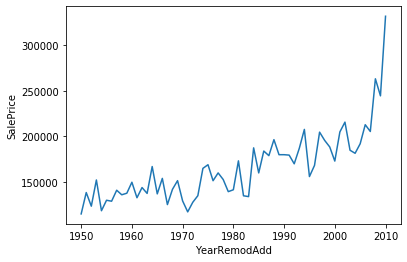

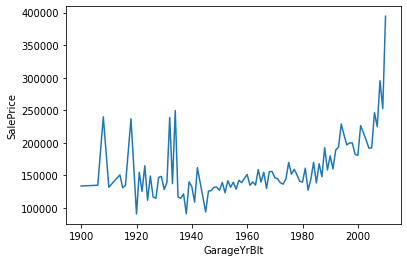

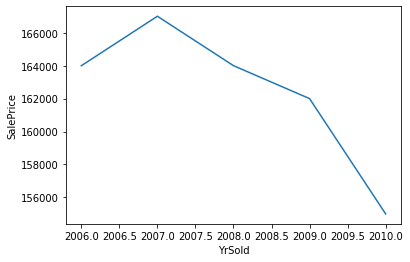

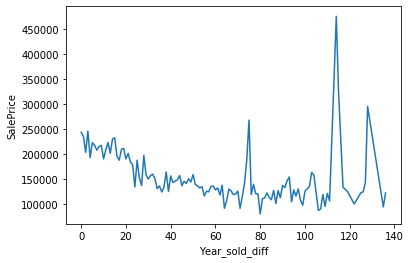

In [267]:
data=dataset.copy()

for i in new_temporal_features:
    data.groupby(i)['SalePrice'].median().plot()
    plt.ylabel('SalePrice')
    plt.show()

Now we can see that the sale price declines as the difference between YearBuilt and Yearsold increases

........................................................

Now we will deal with Categrical features

In [268]:
categorical_features=[features for features in dataset.columns if dataset[features].dtype=='O']

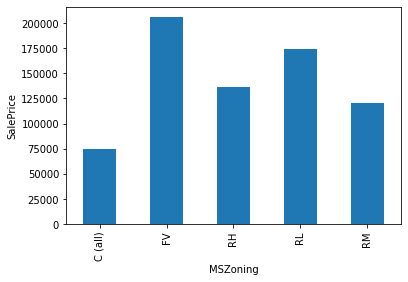

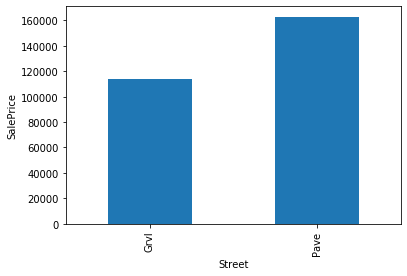

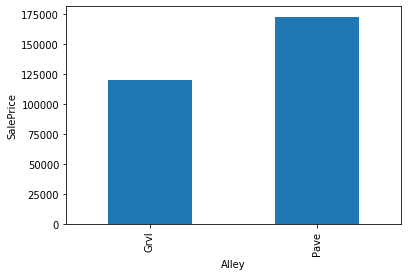

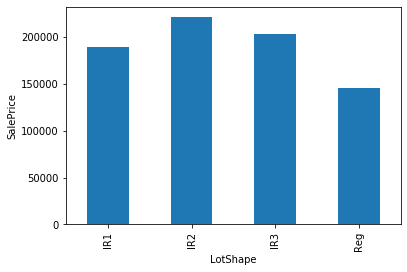

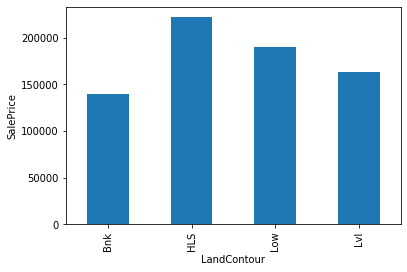

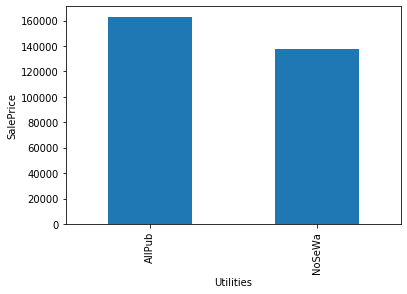

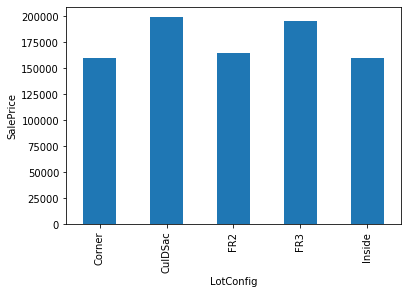

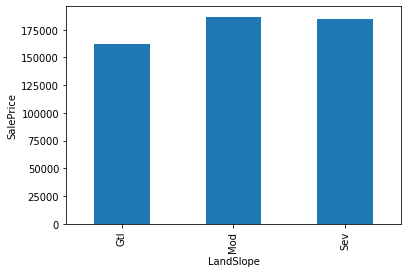

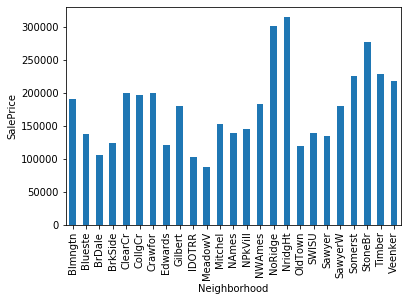

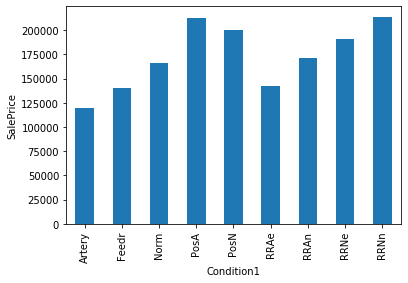

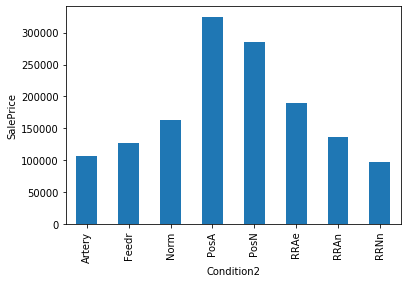

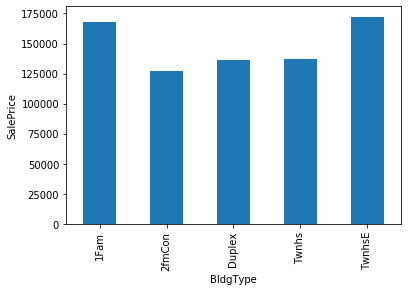

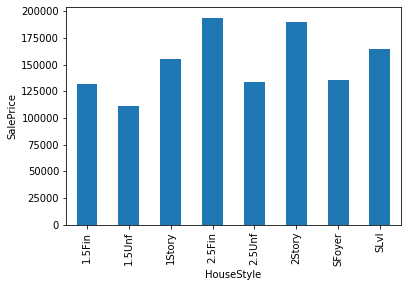

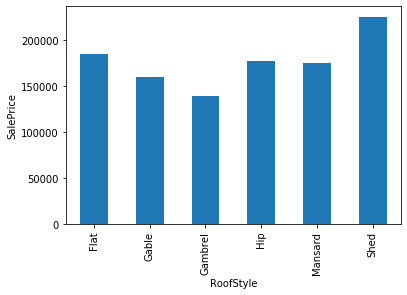

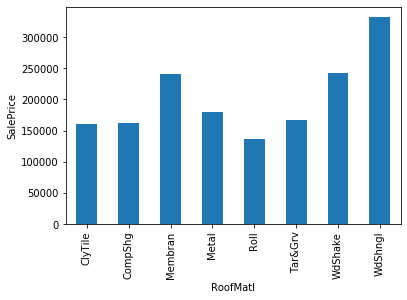

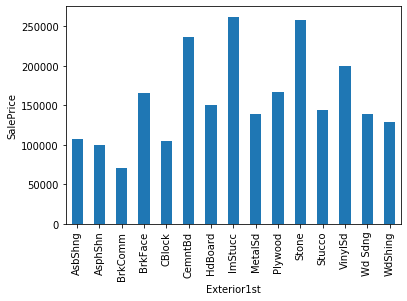

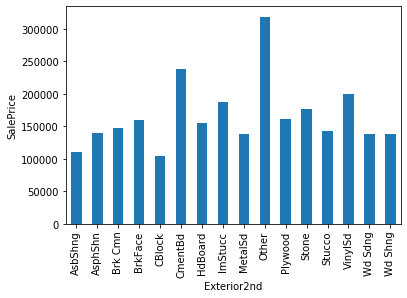

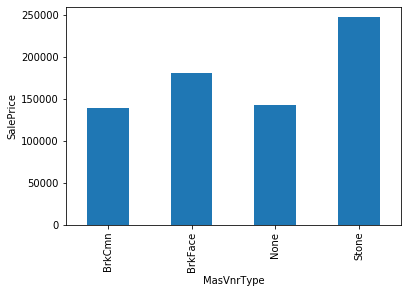

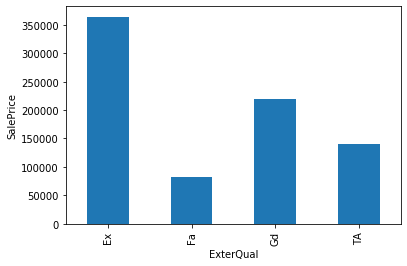

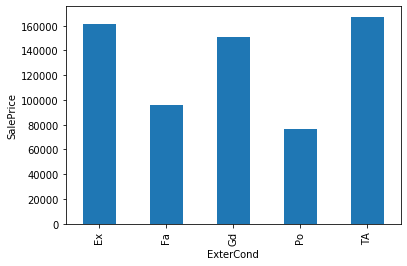

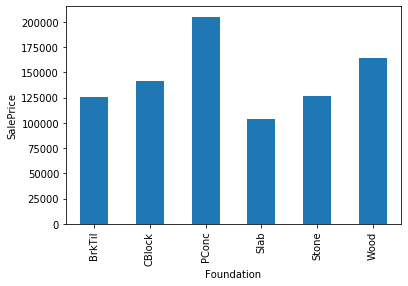

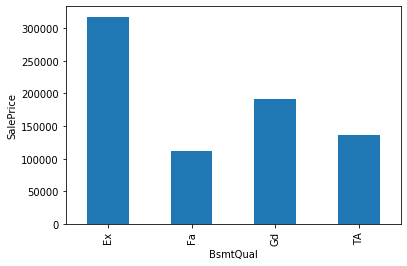

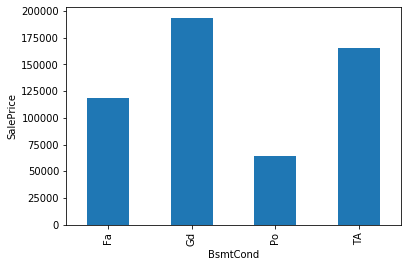

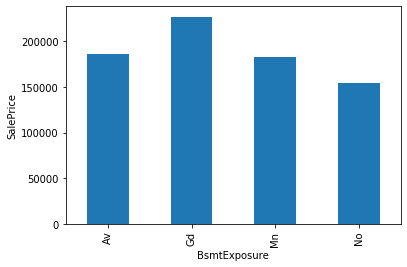

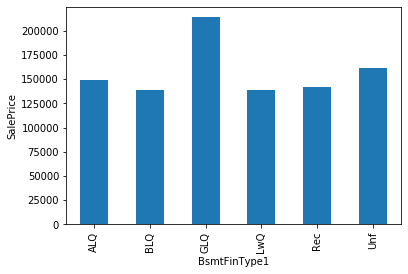

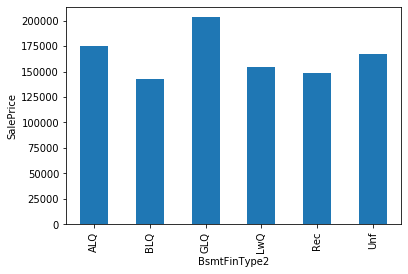

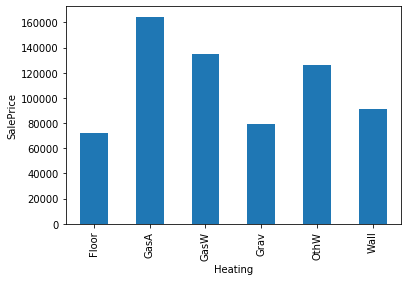

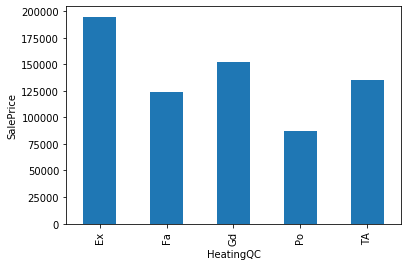

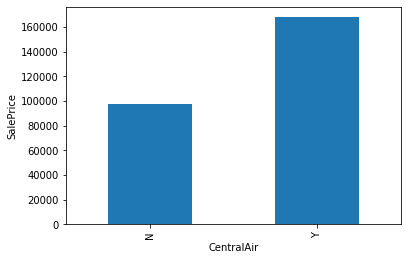

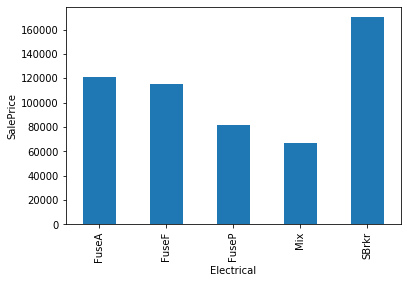

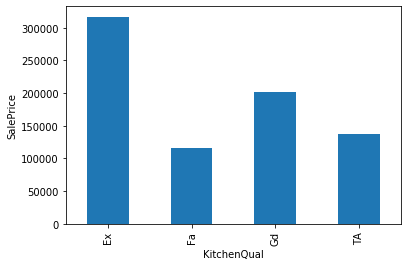

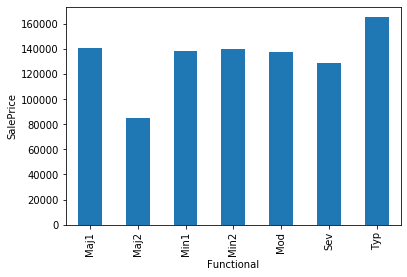

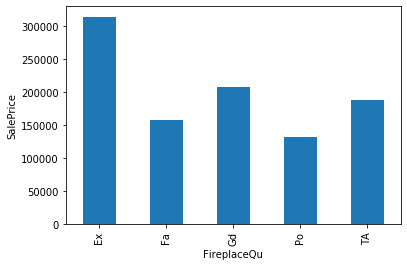

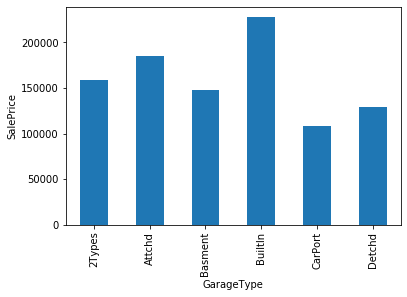

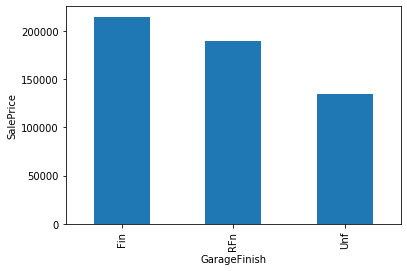

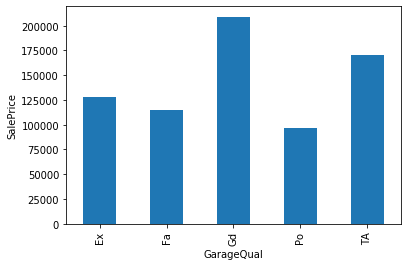

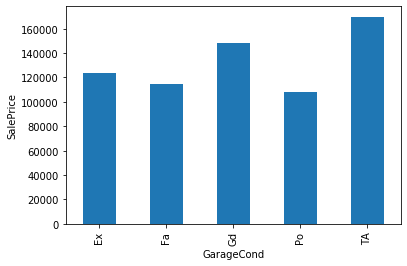

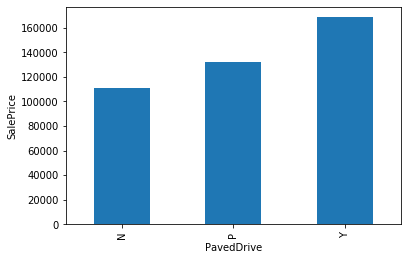

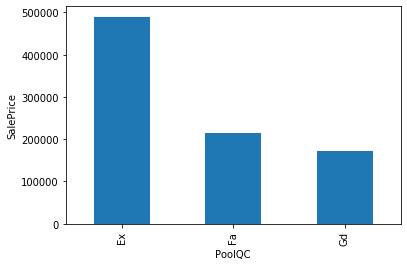

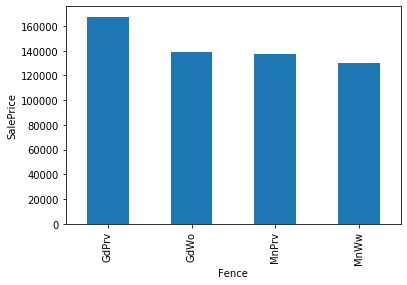

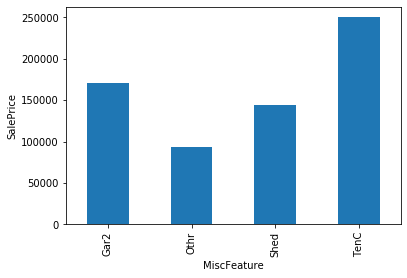

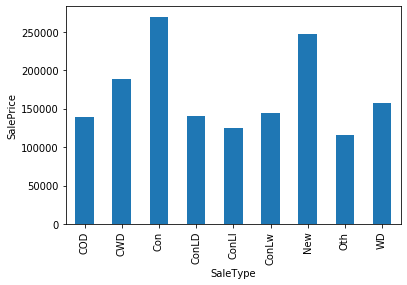

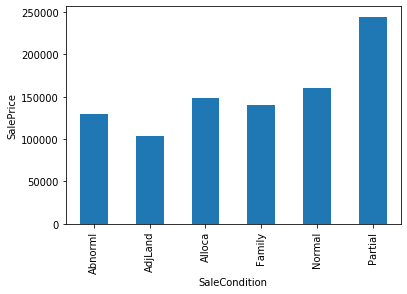

In [269]:
## Relation between Categorical features and Target feature

for i in categorical_features:
    dataset.groupby(i)['SalePrice'].median().plot(kind='bar')
    plt.ylabel('SalePrice')
    plt.show()

In [270]:
## Cardinality of Categorical features

for i in categorical_features:
    print(i,'has',len(dataset[i].unique()),'unique values')

MSZoning has 5 unique values
Street has 2 unique values
Alley has 3 unique values
LotShape has 4 unique values
LandContour has 4 unique values
Utilities has 2 unique values
LotConfig has 5 unique values
LandSlope has 3 unique values
Neighborhood has 25 unique values
Condition1 has 9 unique values
Condition2 has 8 unique values
BldgType has 5 unique values
HouseStyle has 8 unique values
RoofStyle has 6 unique values
RoofMatl has 8 unique values
Exterior1st has 15 unique values
Exterior2nd has 16 unique values
MasVnrType has 5 unique values
ExterQual has 4 unique values
ExterCond has 5 unique values
Foundation has 6 unique values
BsmtQual has 5 unique values
BsmtCond has 5 unique values
BsmtExposure has 5 unique values
BsmtFinType1 has 7 unique values
BsmtFinType2 has 7 unique values
Heating has 6 unique values
HeatingQC has 5 unique values
CentralAir has 2 unique values
Electrical has 6 unique values
KitchenQual has 4 unique values
Functional has 7 unique values
FireplaceQu has 6 unique

.....................................................................................................................................................................................................................................

# Data Engineering

Handeling Missing Values

In [271]:
## Handeling Categorical Missing Values(nan values)

categorical_features_nan=[features for features in categorical_features if dataset[features].isnull().sum()>0]

In [272]:
## Now let's have a look what is the percentage of missing values in each feature

for i in categorical_features_nan:
    print(i,'has',np.round(dataset[i].isnull().mean(),3),'% of missing values')

Alley has 0.938 % of missing values
MasVnrType has 0.005 % of missing values
BsmtQual has 0.025 % of missing values
BsmtCond has 0.025 % of missing values
BsmtExposure has 0.026 % of missing values
BsmtFinType1 has 0.025 % of missing values
BsmtFinType2 has 0.026 % of missing values
Electrical has 0.001 % of missing values
FireplaceQu has 0.473 % of missing values
GarageType has 0.055 % of missing values
GarageFinish has 0.055 % of missing values
GarageQual has 0.055 % of missing values
GarageCond has 0.055 % of missing values
PoolQC has 0.995 % of missing values
Fence has 0.808 % of missing values
MiscFeature has 0.963 % of missing values


As we can see some of the features have more than 80% of missing values, it is better to get rid of those features

In [273]:
categorical_features_nan_new=[features for features in categorical_features_nan if dataset[features].isnull().mean()<0.50] #Taking 50% as a thresh hold


In [274]:
## Replacing the missing values/NaN values with different values

for i in categorical_features_nan_new:
    dataset[i]=dataset[i].fillna('missing')
    
dataset[categorical_features_nan_new].isnull().sum()      

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [275]:
## Handeling Numerical Missing Values

numerical_features_nan=[features for features in numerical_features if dataset[features].isnull().sum()>0]

In [276]:
## Let's have a look at the missing value percentage

for i in numerical_features_nan:
    print(i,'has',np.round(dataset[i].isnull().mean(),3),'% of misisng values')

LotFrontage has 0.177 % of misisng values
MasVnrArea has 0.005 % of misisng values
GarageYrBlt has 0.055 % of misisng values


So it can be said that no numerical features have to be removed

In [277]:
## Replacing the missing values

for i in numerical_features_nan:
    dataset[i]=dataset[i].fillna(dataset[i].median())

dataset[numerical_features_nan].isnull().sum()    

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [278]:
for i in ['YearRemodAdd', 'GarageYrBlt']:
    dataset[i+'difference']=dataset['YrSold']-dataset[i]
    

In [279]:
## Now as the continuous numerical featres are skewed we will perform Log Transformation over them

for i in cont_numerical_features:
    if 0 not in dataset[i].unique():
        dataset[i]=np.log(dataset[i])

## let's Log transform the Target feature also

dataset['SalePrice']=np.log(dataset['SalePrice'])

In [280]:
new_categorical_features=[features for features in categorical_features if features not in ['Alley','PoolQC','Fence','MiscFeature']]

for i in new_categorical_features:
    a=dataset.groupby(i)['SalePrice'].mean().sort_values().index
    b={k:i for i,k in enumerate(a,0)}
    dataset[i]=dataset[i].map(b)
  

In [281]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Year_sold_diff,YearRemodAdddifference,GarageYrBltdifference
0,1,60,3,4.174387,9.041922,1,NaN,0,1,1,0,0,15,3,4,3,6,7,5,2003,2003,1,2,12,13,2,196.0,2,3,5,3,3,1,6,706,5,0,150,856,5,4,1,5,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,1,5,2003.0,2,2,548,3,5,2,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,4,4,12.247694,5,5,5.0
1,2,20,3,4.382027,9.169518,1,NaN,0,1,1,2,0,20,1,4,3,4,6,8,1976,1976,1,2,6,6,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,5,4,1,5,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,6,1,3,5,1976.0,2,2,460,3,5,2,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,4,4,12.109011,31,31,31.0
2,3,60,3,4.219508,9.328123,1,NaN,1,1,1,0,0,15,3,4,3,6,7,5,2001,2002,1,2,12,13,2,162.0,2,3,5,3,3,2,6,486,5,0,434,920,5,4,1,5,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,3,5,2001.0,2,2,608,3,5,2,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,4,4,12.317167,7,6,7.0
3,4,70,3,4.094345,9.164296,1,NaN,1,1,1,1,0,17,3,4,3,6,7,5,1915,1970,1,2,4,7,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,5,3,1,5,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,4,2,1998.0,1,3,642,3,5,2,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,4,1,11.849398,91,36,8.0
4,5,60,3,4.430817,9.565214,1,NaN,1,1,1,2,0,24,3,4,3,6,8,5,2000,2000,1,2,12,13,2,350.0,2,3,5,3,3,3,6,655,5,0,490,1145,5,4,1,5,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,3,5,2000.0,2,3,836,3,5,2,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,4,4,12.429216,8,8,8.0


Now let's scale the features

In [282]:
scale_features=[features for features in dataset.columns if features not in ['Id','SalePrice','Alley','PoolQC','Fence','MiscFeature']+temporal_features ]

In [283]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
sclr=scale.fit_transform(dataset[scale_features])

In [284]:
dataset_new=pd.concat([dataset[['SalePrice']],pd.DataFrame((sclr),columns=scale_features)],axis=1)

In [285]:
dataset_new.head(5)

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,Year_sold_diff,YearRemodAdddifference,GarageYrBltdifference
0,12.247694,0.235294,0.75,0.418208,0.366344,1.0,0.000000,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.2,0.285714,0.857143,0.866667,0.50,0.12250,0.666667,0.75,1.0,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.833333,0.666667,0.50,0.386460,0.6,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.5,0.8,0.036765,0.098361,0.046729
1,12.109011,0.000000,0.75,0.495064,0.391317,1.0,0.000000,0.333333,1.0,0.50,0.0,0.833333,0.125,0.571429,0.75,0.571429,0.555556,0.875,0.2,0.285714,0.428571,0.400000,0.25,0.00000,0.333333,0.75,0.4,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.833333,0.666667,0.50,0.324401,0.6,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.5,0.8,0.227941,0.524590,0.289720
2,12.317167,0.235294,0.75,0.434909,0.422359,1.0,0.333333,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.2,0.285714,0.857143,0.866667,0.50,0.10125,0.666667,0.75,1.0,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.833333,0.666667,0.50,0.428773,0.6,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.5,0.8,0.051471,0.114754,0.065421
3,11.849398,0.294118,0.75,0.388581,0.390295,1.0,0.333333,0.333333,1.0,0.25,0.0,0.708333,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.2,0.285714,0.285714,0.466667,0.25,0.00000,0.333333,0.75,0.2,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.333333,0.333333,0.75,0.452750,0.6,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.5,0.2,0.669118,0.606557,0.074766
4,12.429216,0.235294,0.75,0.513123,0.468761,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.375,0.571429,0.75,0.857143,0.777778,0.500,0.2,0.285714,0.857143,0.866667,0.50,0.21875,0.666667,0.75,1.0,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.833333,0.666667,0.75,0.589563,0.6,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.5,0.8,0.058824,0.147541,0.074766


In [286]:
dataset_new.to_csv('Kaggle_train.csv',index=False)